In [1]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
# from PIL import Image
# import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy.ndimage import center_of_mass
import math 
from plotly.subplots import make_subplots
print(tf.__version__)

2.14.0


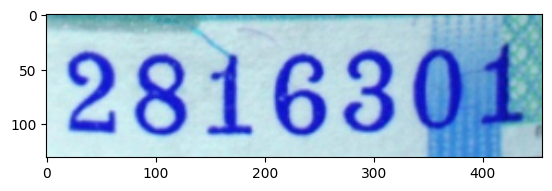

In [2]:
model = tf.keras.models.load_model('ideal_my.h5')

image_number = '30-1'

# Load the image
img = cv2.imread(f"{image_number}.png")
# cv2_imshow(img)

# im = Image.open(f"{image_number}.jpg")
# im.show()
plt.imshow(img)

In [3]:
# zoom_factor=3
# img = cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor)
# plt.imshow(img)

In [4]:
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# grayImage = cv2.bilateralFilter(grayImage,9,75,75)


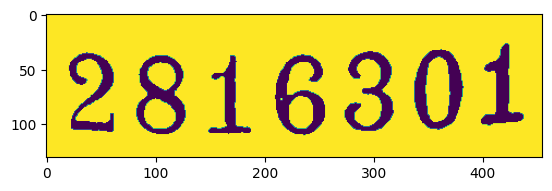

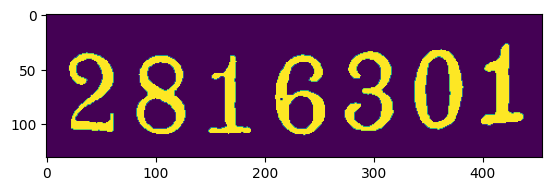

In [5]:
(_, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

# cv2_imshow(blackAndWhiteImage)
plt.imshow(blackAndWhiteImage)
plt.show()

# thresh1 = cv2.adaptiveThreshold(grayImage, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
thresh = cv2.bitwise_not(blackAndWhiteImage)
# cv2_imshow(thresh)
plt.imshow(thresh)
plt.show()


In [6]:
thresh = cv2.GaussianBlur(thresh,(5,5),0)

In [7]:
    # Find the contours of the digits
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

1/1 [==============================] - 0s 31ms/step


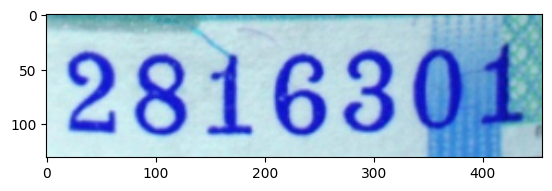

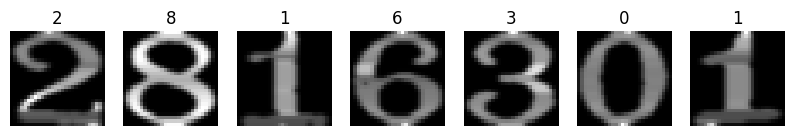

In [8]:
  # Extract the digits from the image and recognize them
names = []
images = []

output = img.copy()
letters = []
for i, contour in enumerate(contours):
        # Extract the bounding box of the digit
        x, y, w, h = cv2.boundingRect(contour)
        # if hierarchy[0][i][3] == 0:
        #     cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
        #Filter out small and large components

    
        # if w * h < 10250 or w * h > 14850:
        #     continue

    
        # Extract the digit from the image
        digit = thresh[y:y+h, x:x+w]

        # Save the digit to a file
        # filename = f"{i}_digit.jpg"
        # filepath = os.path.join(output_dir, filename)
        # filepath = "//content/drive/MyDrive"
        # cv2.imwrite(filepath, digit)

        # Resize the digit and preprocess it for recognition
        digit = cv2.resize(digit, (28, 28), interpolation=cv2.INTER_AREA)
        digit = tf.keras.utils.normalize(digit, axis = 1)
        digit = digit.reshape(-1, 28, 28, 1)

        # Recognize the digit using the model
        prediction = model.predict(digit)
        digit_class = np.argmax(prediction)
        letters.append([x, y+h, digit.reshape(28, 28), digit_class])

letters.sort(key=lambda x: (x[0], x[1]), reverse=False)

for el in letters:
    images.append(el[2])
    names.append(el[3])

# cv2_imshow(img)
plt.imshow(img)
i = 1

# create figure
fig = plt.figure(figsize=(10, 10))

# setting values to rows and column variables
rows = 2
columns = 7

for img, name in zip(images, names):
# show image
    fig.add_subplot(rows, columns, i)
    plt.style.use('grayscale')
    plt.imshow(img)
    plt.axis('off')
    plt.title(str(name))
    i += 1
    # plt.grid(False)
    # plt.style.use('dark_background')
   